# Plots of oscilloscope records

In [1]:
import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np


## Read waveforms from the file

XINC: 5e-08    YINC: 0.02    FRAMES: 508    TRIG: 0.0905    YORIGIN: -74.0
1 , -0.02 , 0.12 , 17.94
2 , -0.02 , 0.28 , 50.1
3 , -0.02 , 2.3 , 744.02
4 , -0.02 , 2.3 , 756.58
5 , -0.02 , 0.06 , 5.92
6 , -0.02 , 2.36 , 770.8
7 , -0.02 , 1.94 , 688.88
8 , -0.02 , 2.4 , 789.98
9 , -0.02 , 0.44 , 307.24


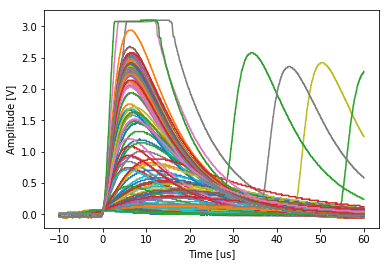

In [196]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np


with h5py.File('./data/data01.h5','r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    print 'XINC:', np.array(hf.get('XINC')), '   YINC:', np.array(hf.get('YINC')), '   FRAMES:', np.array(hf.get('FRAMES')), '   TRIG:', np.array(hf.get('TRIG')), '   YORIGIN:', np.array(hf.get('YORIGIN'))
    frames = np.array(hf.get('FRAMES'))
    for n in range(1,frames+1):
        data = hf.get(str(n))
        np_data = 1.0 * np.array(data)
        np_data = np_data - 128 - np.array(hf.get('YORIGIN'))
        np_data = np.array(hf.get('YINC')) * np_data    # to Volts
        np_time = range(0,1400)
        np_time *= np.array(hf.get('XINC'))
        np_time *= 1e6   # to microseconds
        np_time -= 10    # trigger time offset
        
        plt.plot(np_time, np_data) 
        #print np_data
        maximum = 0
        minimum = 255
        suma = 0
        for i in range(1400):
            if np_data[i] > maximum:
                maximum = np_data[i]
            if np_data[i] < minimum:
                minimum = np_data[i]
            suma = suma + np_data[i]
        if n<10:
            print n,',', minimum,',', maximum,',', suma
            
plt.xlabel('Time [us]')
plt.ylabel('Amplitude [V]')


## Parse all data files in current directory
Read in all the data files in current directory and process them into a histogram.

./data/170603-034325-Si490-0.2-V-no-binary/data04.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/170603-034325-Si490-0.2-V-no-binary/data03.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/170603-034325-Si490-0.2-V-no-binary/data01.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/170603-034325-Si490-0.2-V-no-binary/data02.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/170603-010909-Si490-15-V-binary-none-1/data04.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/170603-010909-Si490-15-V-binary-none-1/data03.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/170603-010909-Si490-15-V-binary-none-1/data01.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/170603-010909-Si490-15-V-binary-none-1/data02.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/170603-020846-Si490-06-V-no-binary/data01.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/170603-020846-Si490-06-V-no-

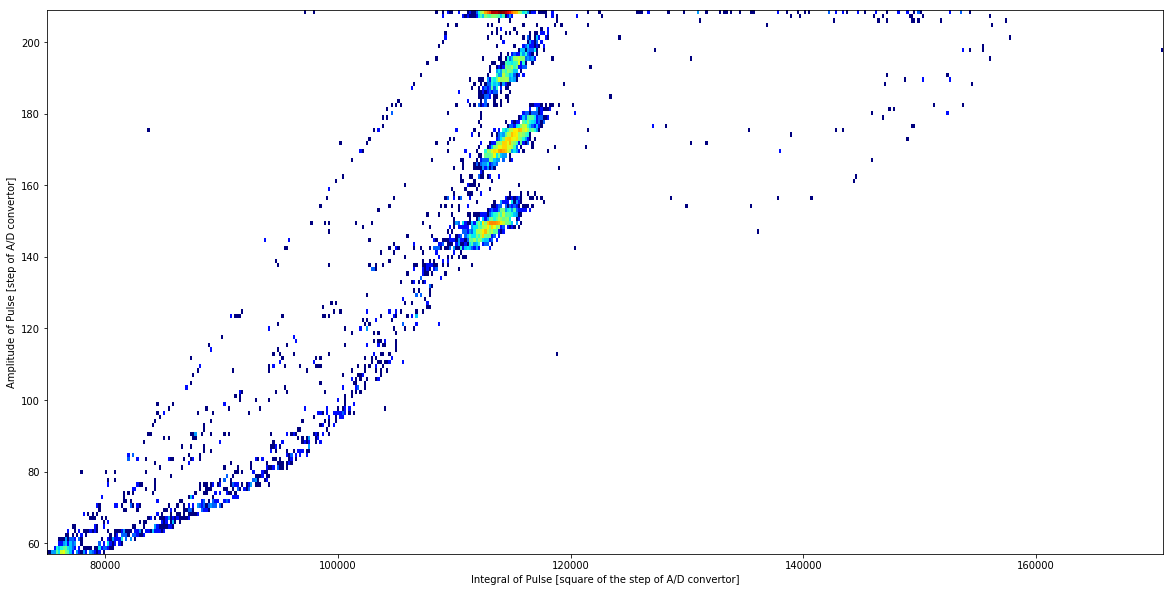

In [153]:
%matplotlib inline 

import matplotlib.pyplot as plt
import sys
import os
import time
import h5py
import numpy as np
import glob
import matplotlib

plt.figure(figsize=(20,10))

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
     
for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

for f in glob.iglob("./data/**/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass


    
plt.figure(figsize=(20,10))



ble = plt.hist2d(y, x, bins=(500,129), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(500,200),  cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
#cb = plt.colorbar()
#cb.set_label('Count')

#plt.plot([0,10000],[100,100],ls='-',c='r',marker='o')
plt.plot([0,100000],[100,1000],c='r',lw=3,zorder=99)
plt.show()


# Simply replot the current x, y in a nicer way

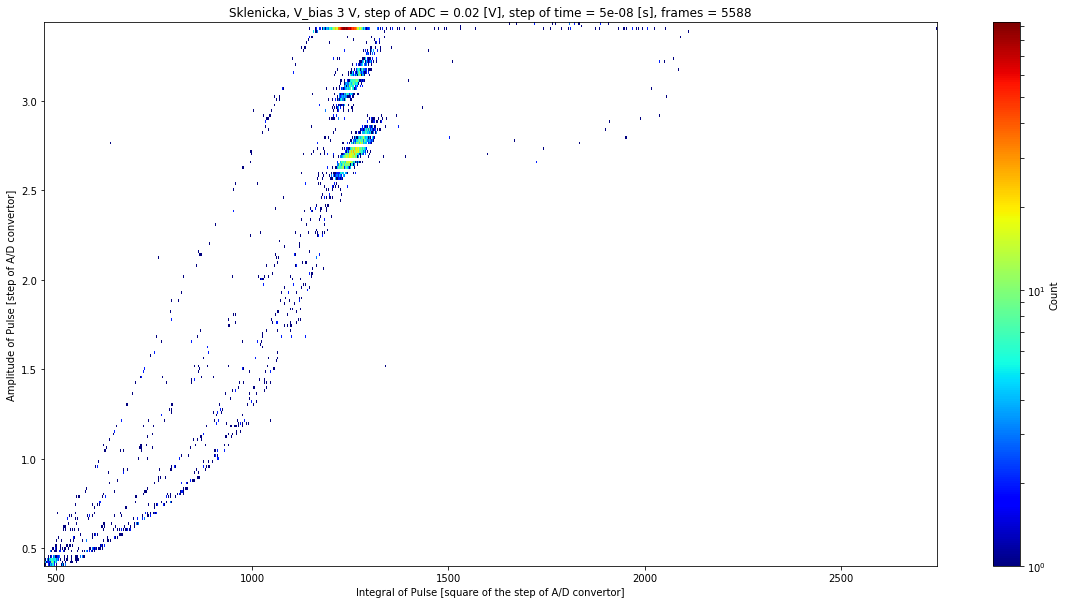

In [49]:
plt.figure(figsize=(20,10))

#ble = plt.hist2d(y, x, bins=(1000,250-50),range=np.array([(70000,160000),(50,250)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
ble = plt.hist2d(y, x, bins=(1000,250-50), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
#ble = plt.hist2d(y, x, bins=(100,30),range=np.array([(70000, 80000),(50,80)]), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.xlabel('Integral of Pulse [square of the step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
plt.title('Sklenicka, V_bias 3 V, step of ADC = ' + str(yinc) + ' [V], step of time = ' + str(xinc) + ' [s], frames = '+ str(all_frames))
cb = plt.colorbar()
cb.set_label('Count')

## Cut Plot

./data/data04.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/data05.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/data03.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/data01.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0
./data/data02.h5 XINC: 5e-08  YINC: 0.02  FRAMES: 508  YORIGIN: -74.0


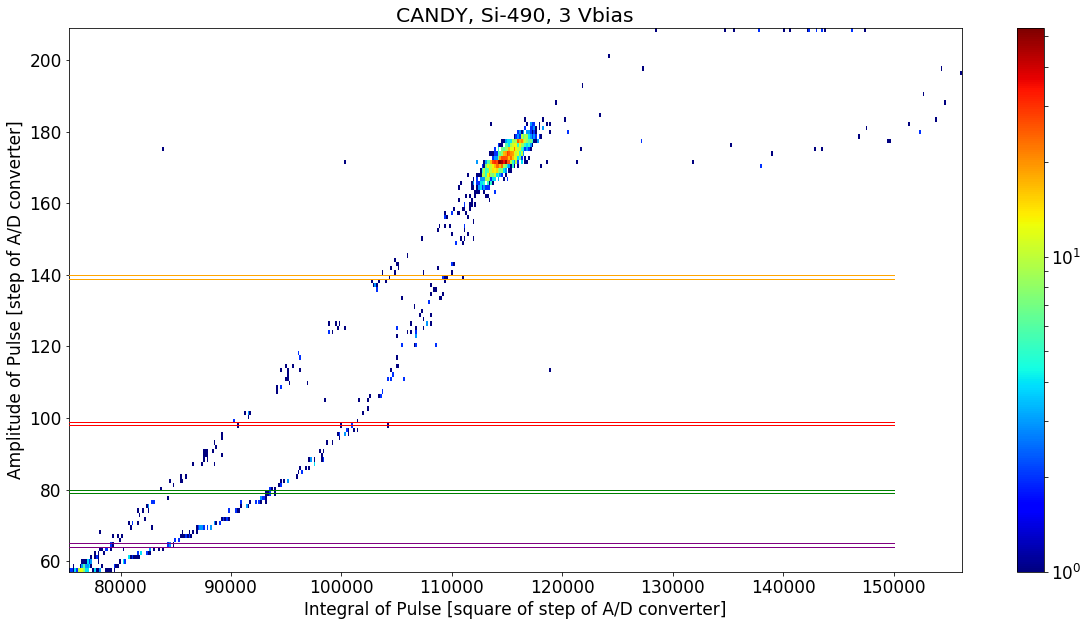

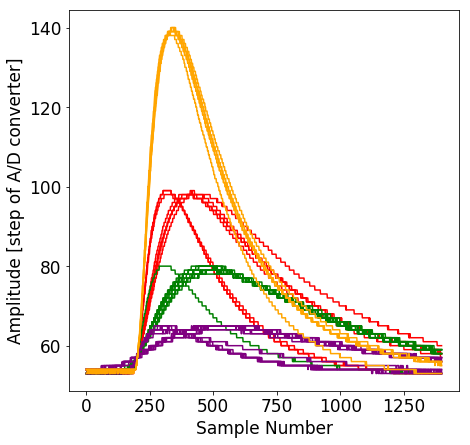

In [201]:
matplotlib.rcParams.update({'font.size': 17})

x = []
y = []
z = []
all_frames = 0
xinc = 0
yinc = 0

def ProcessData():
        global all_frames
        global xinc
        global yinc
        #print('List of arrays in this file: \n', hf.keys())
        xinc = np.array(hf.get('XINC'))
        yinc = np.array(hf.get('YINC'))
        yorigin = np.array(hf.get('YORIGIN'))
        
        frames = np.array(hf.get('FRAMES'))
        all_frames = all_frames + frames
        print 'XINC:', xinc, ' YINC:', yinc, ' FRAMES:', frames, ' YORIGIN:', yorigin 
        
        for n in range(1,frames+1):
            
            data = hf.get(str(n))
            #np_data = np.array(data)
            np_data = np.array(data)
            #np_data += *np.array(hf.get('YORIGIN'))
            #np_data = np.array(hf.get('YINC'))*np_data
            #plt.plot(np_data)
            #print np_data
            maximum = 0
            minimum = 255
            suma = 0
            for i in range(1400):
                if np_data[i] > maximum:
                    maximum = np_data[i]
                if np_data[i] < minimum:
                    minimum = np_data[i]
                suma = suma + np_data[i]
            x.append(maximum)
            #y.append(suma/maximum)
            y.append(suma)
            z.append((maximum))
            

def Cut(maxmax,minmin,colour):
    for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
        try:
            with h5py.File(f,'r') as hf:
                frames = np.array(hf.get('FRAMES'))
                for n in range(1,frames+1):
                    data = hf.get(str(n))
                    np_data = 1.0 * np.array(data)

                    maximum = 0
                    minimum = 255
                    for i in range(1400):
                        if np_data[i] > maximum:
                            maximum = np_data[i]
                        if np_data[i] < minimum:
                            minimum = np_data[i]

                    if (maximum <= maxmax) and (maximum >= minmin):
                        plt.plot(np_data, c=colour)
        except:        
            pass

     
for f in glob.iglob("./data/data*.h5"): # generator, search immediate subdirectories 
    print f,
    try:
        with h5py.File(f,'r') as hf:
                ProcessData()
    except:        
        pass

    
plt.figure(1,figsize=(20,10))
matplotlib.rc('axes',edgecolor='black')

ble = plt.hist2d(y, x, bins=(500,128), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet)
plt.title('CANDY, Si-490, 3 Vbias')
plt.xlabel('Integral of Pulse [square of step of A/D converter]')
plt.ylabel('Amplitude of Pulse [step of A/D converter]')
cb = plt.colorbar()

maxmax1 = 99
width = 1
minmin1 = maxmax1-width
plt.plot([0,150000],[maxmax1,maxmax1],c='r',lw=1,zorder=99)
plt.plot([0,150000],[minmin1,minmin1],c='r',lw=1,zorder=99)

maxmax2 = 80
width = 1
minmin2 = maxmax2-width
plt.plot([0,150000],[maxmax2,maxmax2],c='g',lw=1,zorder=99)
plt.plot([0,150000],[minmin2,minmin2],c='g',lw=1,zorder=99)

maxmax3 = 65
width = 1
minmin3 = maxmax3-width
plt.plot([0,150000],[maxmax3,maxmax3],c='purple',lw=1,zorder=99)
plt.plot([0,150000],[minmin3,minmin3],c='purple',lw=1,zorder=99)

maxmax4 = 140
width = 1
minmin4 = maxmax4-width
plt.plot([0,150000],[maxmax4,maxmax4],c='orange',lw=1,zorder=99)
plt.plot([0,150000],[minmin4,minmin4],c='orange',lw=1,zorder=99)

plt.figure(2,figsize=(7,7))
#matplotlib.rc('axes',edgecolor='r')
Cut(maxmax1,minmin1,'r')
Cut(maxmax2,minmin2,'g')
Cut(maxmax3,minmin3,'purple')
Cut(maxmax4,minmin4,'orange')

plt.xlabel('Sample Number')
plt.ylabel('Amplitude [step of A/D converter]')

